In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv('heart-1.csv')
df = data.copy()

In [4]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
#check if there is  disparity between records having target 1 or 0 
df[df['target']==1].shape

(165, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Text(0.5, 1.0, 'Age Distribution')

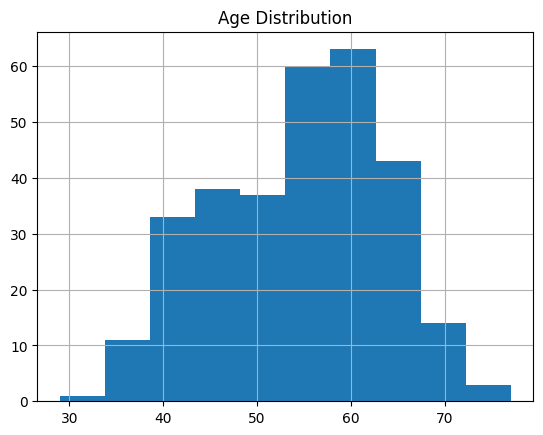

In [8]:
df['age'].hist(grid =True, bins =10)
plt.title('Age Distribution')

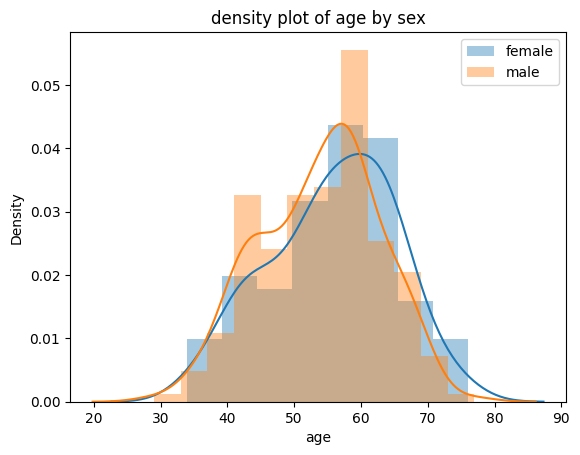

In [9]:
sns.distplot(df[df['sex']==0]['age'],label = 'female')
sns.distplot(df[df['sex']==1]['age'],label = 'male')
plt.legend()
plt.title('density plot of age by sex')
plt.show()

<AxesSubplot: xlabel='slope'>

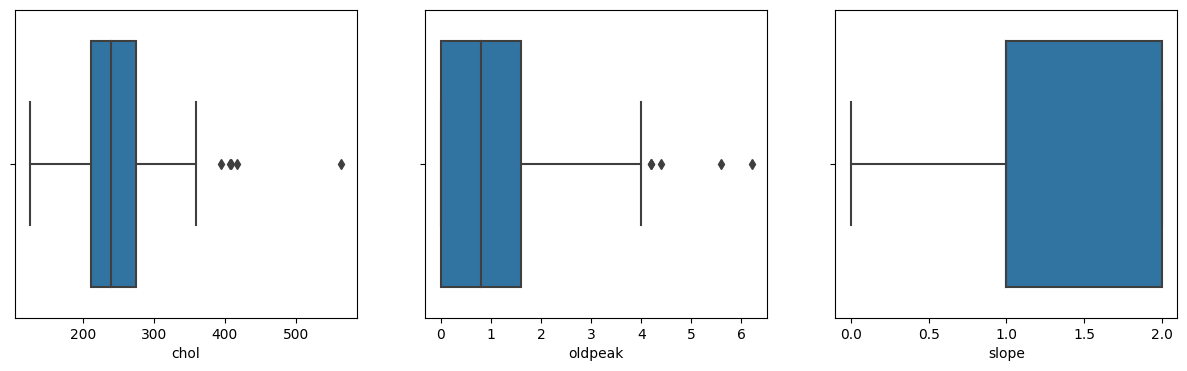

In [10]:
fig,axes = plt.subplots(nrows =1, ncols =3,figsize=(15,4))
sns.boxplot(x = 'chol', data=df,orient='v',ax=axes[0])
sns.boxplot(x = 'oldpeak', data=df,orient='v',ax=axes[1])
sns.boxplot(x = 'slope', data=df,orient='v',ax=axes[2])

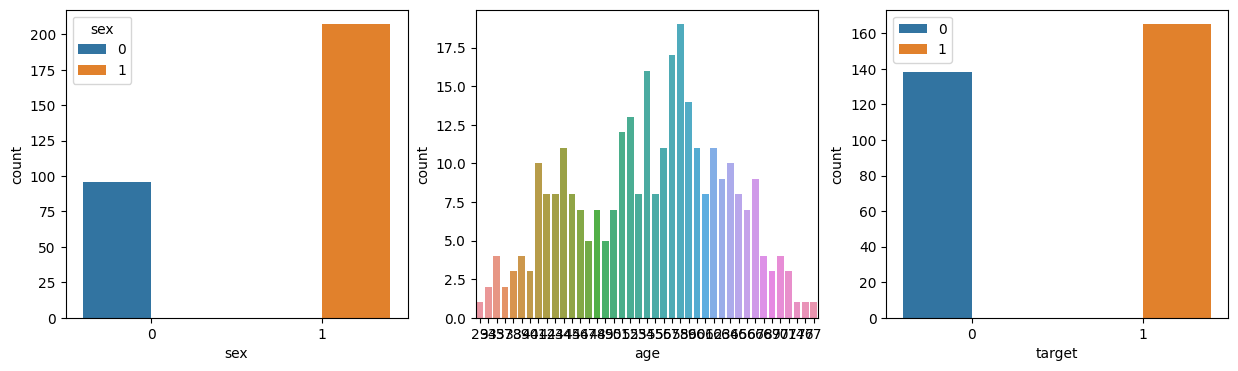

In [11]:
fig,axes = plt.subplots(nrows =1, ncols =3,figsize=(15,4))
sns.countplot(x = 'sex', data=df,hue='sex',ax=axes[0])
sns.countplot(x = 'age', data=df,ax=axes[1])
sns.countplot(x = 'target', data=df,hue='target',ax=axes[2])
plt.legend()
plt.show()

<AxesSubplot: >

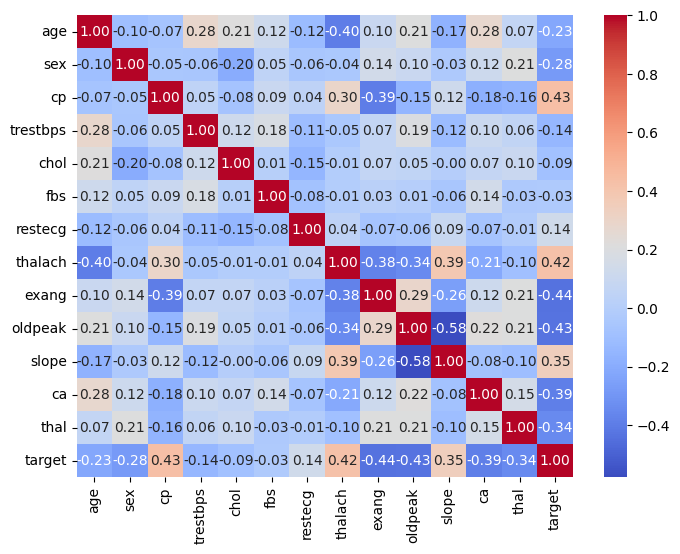

In [12]:
plt.figure(figsize=(8,6))
corr =df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='0.2f')

In [13]:
# function to check multi-colinearity
# threshold > 0.8,(0.6 to 0.75 approx) or 80% we will not consider one of them

In [14]:
def correlation(df,threshold):
    correlated_cols = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) >= threshold:
                colname = corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols

In [15]:
corr_feature = correlation(df ,0.5)
print(corr_feature)

{'slope'}


Text(0.5, 1.0, 'cholestrol v/s Blood Pressure')

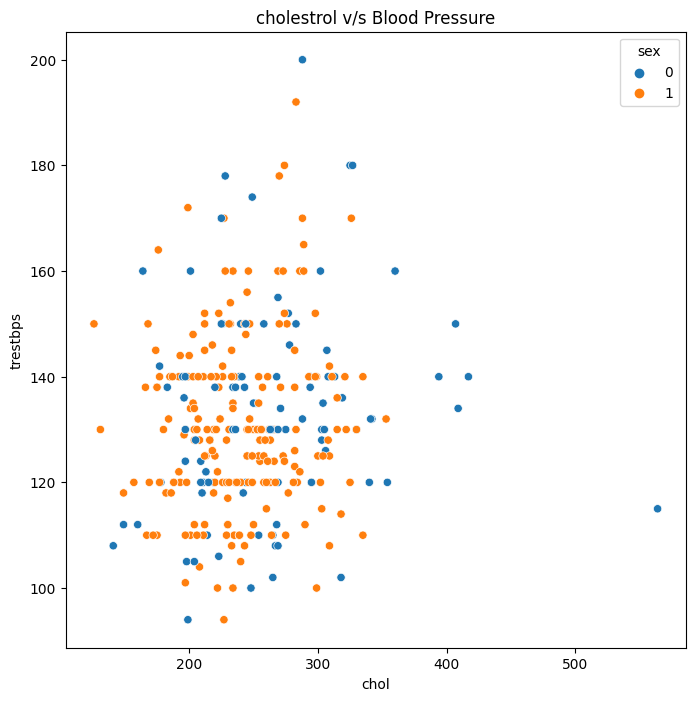

In [16]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='chol' ,y='trestbps', hue='sex', data=df)
plt.title('cholestrol v/s Blood Pressure')

as can be seen there is a patient with high cholesterol. But,there's not a specific division between those that feel pain during exercise practise and those of not feel pain.

In [17]:
X= df.drop(columns = ['target'])
y = df['target']
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=29, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(212, 13)
(91, 13)


In [19]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [20]:
print("Train score", accuracy_score(y_train_pred, y_train))
print("Test score", accuracy_score(y_test_pred, y_test))


Train score 1.0
Test score 0.8021978021978022


In [21]:
#Random forest classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=3, random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [23]:
predictions = rf_model.predict(X_test)
predictions

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [24]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3


In [25]:
print("Test Score", accuracy_score(predictions, y_test))

Test Score 0.8021978021978022


In [26]:
#logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
predictions = model_lr.predict(X_test)
accuracy_score(predictions, y_test)

0.8681318681318682